In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

from sklearn.linear_model import Perceptron as pc
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [3]:
# Rosenblatt's perceptron

class Perceptron:
    
    def __init__(self, eta = 0.1, epochs = 10, is_verbose = False):
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    def __predict(self, x):
        total_stimulation = np.dot(x,self.w)
        # ***** optimised version *****
        y_pred = np.where(total_stimulation > 0, 1, -1)
        
#         if total_stimulation > 0:
#             y_pred = 1
#         else:
#             y_pred = -1

        return y_pred
        
    def predict(self,x):
        
        ones = np.ones((x.shape[0], 1))
        x_1 = np.append(x.copy(),ones,1)
        
        return self.__predict(x_1)
        
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(),ones,1)
        
        self.w = np.random.rand(X_1.shape[1])
        #  print('Initial w:')
        #  print(w)

        # for i in range(len(X_1)):
        #     print(predict(X_1[i,],w))


        for epoch in range(self.epochs):
            
            number_of_errors = 0
            
            # ***** optimised version *****
            y_pred = self.__predict(X_1)
            delta_w = self.eta * np.dot((y - y_pred),X_1)
            self.w += delta_w
            #print(w)
            number_of_errors = np.count_nonzero(y - y_pred)
            
#             for x, y_target in zip(X_1,y):
#                 y_pred = self.predict(x)
#                 delta_w = self.eta*(y_target-y_pred)*x
#                 self.w += delta_w
#                 #print(w)
#                 number_of_errors += 1 if y_target != y_pred else 0
                
            self.list_of_errors.append(number_of_errors)

            if(self.is_verbose):
                print(f'Epoch: {epoch}, weigths: {self.w}, number of errors: {number_of_errors}')
                
                
                


[ 0.38438238 -2.26329744  3.4270602   0.72801547]
[1]
[-1]
[1]


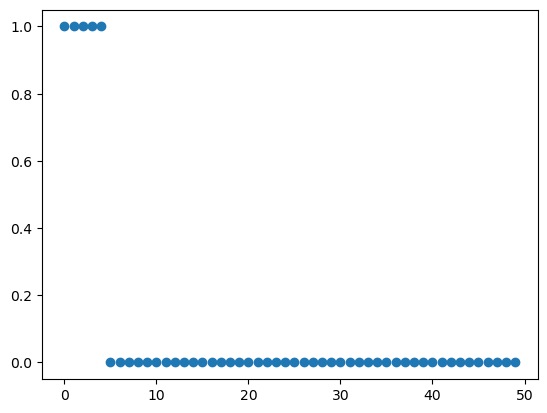

In [4]:
# X = np.arange(-25,25).reshape(10,5)
# y = np.array([1, -1, -1, 1, -1, 1, -1, -1, 1, -1])

X = np.array([
    [2,4,20],       #2*2 - 3*4 + 20 =  12 > 0
    [3,3,-15],      #2*3 - 3*3 - 15 = -18 < 0
    [5,2,10],       #2*5 - 3*2 + 10 =  14 > 0
    [3,6,3],        #2*3 - 3*6 + 3  =  -9 < 0
    [6,2,2],        #2*6 - 3*2 - 2  =   4 > 0
    #[2,4,-3]        #2*2 - 3*4 - 3 = -11 < 0
])

y = [1,-1,1,-1,1]

perceptron = Perceptron(eta = 0.1, epochs = 50,is_verbose=False)
perceptron.fit(X,y)

print(perceptron.w)

print(perceptron.predict(np.array([[2,4,20]])))
print(perceptron.predict(np.array([[20,100,-1]])))
print(perceptron.predict(np.array([[3,3,3]])))
    
plt.scatter(range(perceptron.epochs),perceptron.list_of_errors)

In [5]:
X = np.array([
    [2, 4,  20],  # 2*2 - 4*4 + 20 =   8 > 0
    [4, 3, -10],  # 2*4 - 4*3 - 10 = -14 < 0
    [5, 6,  13],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5, 4,   8],  # 2*5 - 4*4 + 8 =    2 > 0
    [3, 4,   5],  # 2*3 - 4*4 + 5 =   -5 < 0 
])
 
y = np.array([1, -1, -1, 1, -1])


perceptron = Perceptron(eta = 0.1, epochs = 500,is_verbose=False)
perceptron.fit(X,y)

print(perceptron.w)

print(perceptron.predict(np.array([[2,4,20,1]])))
print(perceptron.predict(np.array([[20,100,-1,1]])))
print(perceptron.predict(np.array([[3,3,3,1]])))
    
plt.scatter(range(perceptron.epochs),perceptron.list_of_errors)

[  1.90747201 -10.4120455    3.93770814   1.23260142]


ValueError: shapes (1,5) and (4,) not aligned: 5 (dim 1) != 4 (dim 0)

[ 0.73134795 -0.85617641  0.08735113  0.3886755 ]
[1]
[-1]
[1]


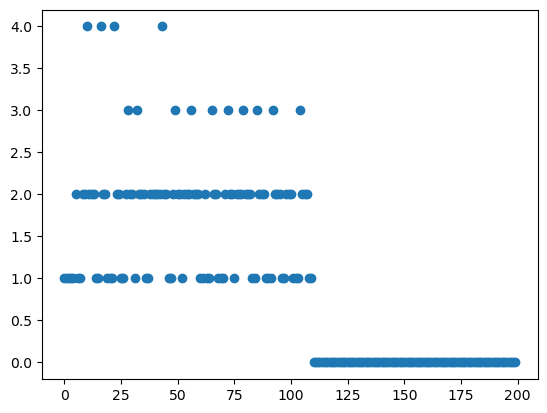

In [6]:
X = np.array([
    [2, 4,  20],  # 2^2 - 4^2 + 20 =  8 > 0
    [4, 3, -10],  # 4^2 - 3^2 - 10 = -3 < 0
    [5, 6,  13],  # 5^2 - 6^2 + 13 =  2 > 0
    [5, 4,  -5],  # 5^2 - 4^2 - 5 =   4 > 0
    [3, 4,   5],  # 3^2 - 4^2 + 5 =  -2 < 0 
 
])
 
y = np.array([1, -1, 1, 1, -1])


perceptron = Perceptron(eta = 0.01, epochs = 200,is_verbose=False)
perceptron.fit(X,y)

print(perceptron.w)

print(perceptron.predict(np.array([[2,4,20]])))
print(perceptron.predict(np.array([[20,100,-1]])))
print(perceptron.predict(np.array([[3,3,3]])))
    
plt.scatter(range(perceptron.epochs),perceptron.list_of_errors)

[(1, 1), (1, 1), (-1, -1), (1, 1), (-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1), (1, 1), (-1, -1), (-1, -1), (1, 1), (-1, -1), (1, 1), (-1, -1), (-1, -1), (-1, -1), (1, 1)]
0


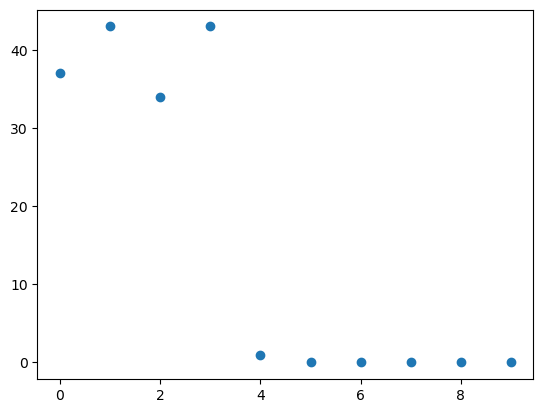

In [7]:
df = pd.read_csv('data/iris.data',header = None)
df = df.iloc[:100, :].copy()
df[4] = df[4].apply(lambda x: 1 if x == 'Iris-setosa' else -1)

X = df.iloc[:, :-1].values
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

perceptron = Perceptron(eta = 0.01, epochs = 10)
perceptron.fit(X_train,y_train)

y_pred = perceptron.predict(X_test)

print(list(zip(y_test,y_pred)))

print(np.count_nonzero(y_test-y_pred))

plt.scatter(range(perceptron.epochs),perceptron.list_of_errors)

In [24]:
# df = pd.read_csv('data/iris.data',header = None)
# df = df.iloc[:100, :].copy()
# #df[4] = df[4].apply(lambda x: 1 if x == 'Iris-setosa' else -1)

# X = df.iloc[:, :-1].values
# y = df.iloc[:,-1]

iris = datasets.load_iris()



X = iris.data[:]
y = iris.target[:]

scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_stand,y,test_size = 0.2)


perceptron = pc(max_iter=20,eta0=0.01)
perceptron.fit(X_train,y_train)

y_pred = perceptron.predict(X_test)

bad_res = [(a,b) for (a,b) in zip(y_test[y_test != y_pred], y_pred[y_test != y_pred]) ]
good_res = [(a,b) for (a,b) in zip(y_test[y_test == y_pred], y_pred[y_test == y_pred]) ]

print(len(good_res)/len(y_test))

print(perceptron.coef_)
print(perceptron.n_iter_)
print(perceptron.intercept_)
print(perceptron.t_)


0.9666666666666667
[[-0.01938686  0.02071771 -0.02898709 -0.02501012]
 [-0.01765012 -0.02169988  0.0259065  -0.04739636]
 [-0.006018   -0.00227127  0.0420938   0.03942823]]
7
[ 0.   -0.01 -0.07]
841.0
